In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
data = pd.read_excel("Data_Analysis_Project.xlsx",sheet_name="Data")
data["Month"] = pd.to_datetime(data["Month ID(YYYYMM)"],format="%Y%m")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product           24 non-null     object        
 1   Month ID(YYYYMM)  24 non-null     int64         
 2   Defects           24 non-null     int64         
 3   Opportunities     24 non-null     int64         
 4   Mean Rate         24 non-null     int64         
 5   2 Sigma limit     24 non-null     int64         
 6   3 Sigma limit     24 non-null     int64         
 7   Month             24 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 1.6+ KB


# EX1

Graph the number of defects over time.

<Axes: xlabel='Month'>

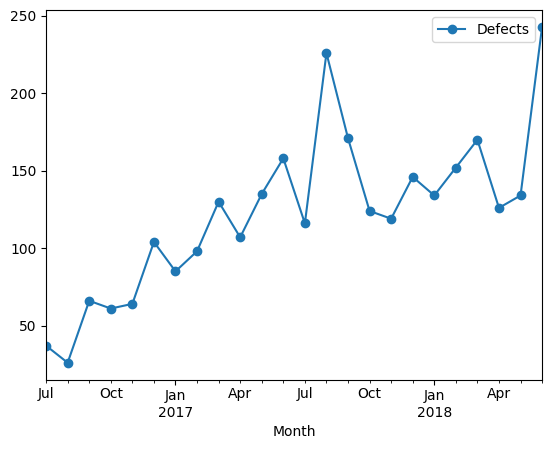

In [4]:
data.plot("Month", "Defects", marker="o")

# EX2

Graph the number of opportunities over time.

<Axes: xlabel='Month'>

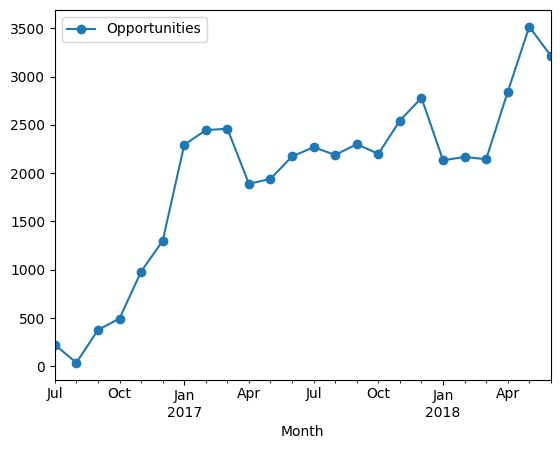

In [5]:
data.plot("Month", "Opportunities", marker="o")

# EX3

Graph defect rate with mean rate and limits over time.

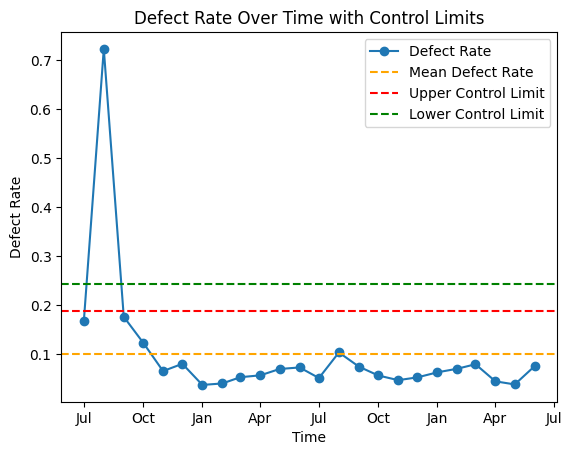

In [9]:
defect_rate = data["Defects"]/data["Opportunities"]
mean_defect_rate = defect_rate.mean()
stdev2 = data['2 Sigma limit']/1000000
stdev3 = data['3 Sigma limit']/1000000
stdev_defect_rate = defect_rate.std()
ctrl_lim_upper = mean_defect_rate+3*stdev_defect_rate
ctrl_lim_lower = mean_defect_rate-3*stdev_defect_rate

plt.plot(data["Month"],defect_rate,marker='o',linestyle='-',label="Defect Rate")
plt.axhline(y=mean_defect_rate,linestyle='--',color='orange',label="Mean Defect Rate")
plt.axhline(y=stdev2[0],linestyle='--',color='red',label="Upper Control Limit")
plt.axhline(y=stdev3[0],linestyle='--',color='green',label="Lower Control Limit")
plt.title("Defect Rate Over Time with Control Limits")
plt.xlabel("Time")
plt.ylabel("Defect Rate")
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,4,7,10]))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# EX4

Show all the Information from Task-1, Task-2 and Task-3 in a figure that can be presented to business, being mindful of formatting & clarity.

<Axes: xlabel='Month'>

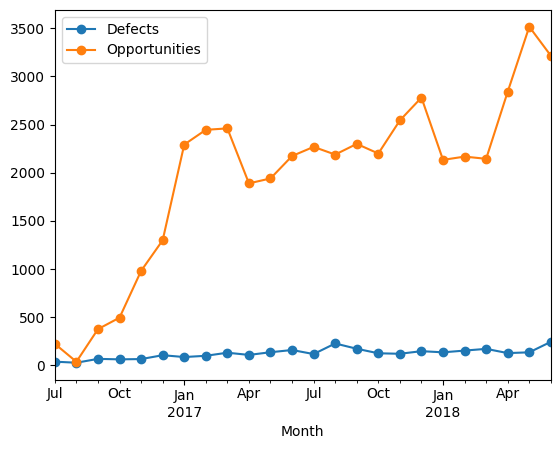

In [7]:
data.plot("Month", ["Defects", "Opportunities"], marker='o')

Text(0.5, 0, 'Month')

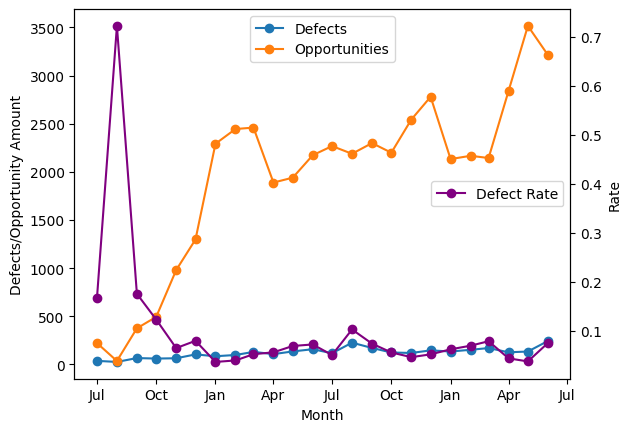

In [24]:
#init graph
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

#plot defects
ax.plot(data["Month"],data["Defects"], marker='o',linestyle='-',label="Defects")

#plot opportunities
ax.plot(data["Month"],data["Opportunities"], marker='o',linestyle='-',label="Opportunities")
ax.set_ylabel("Defects/Opportunity Amount")

#plot defect rate (on second axis so different scale)
ax2.plot(data["Month"],defect_rate,marker='o',linestyle='-',label="Defect Rate",color='purple')
ax2.set_ylabel("Rate")

#legend
ax.legend(loc=9)
ax2.legend(loc=7)

#format x axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,4,7,10]))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_xlabel("Month")